In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import keras
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.keras.datasets import cifar10

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [3]:
dfTrain = pd.read_csv('./Train_copia.csv')
dfValidation = pd.read_csv('./Validation.csv')
dfTest = pd.read_csv('./Test.csv')

In [3]:
dfTrain

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,09/06/2012 13:15,2012-06-09T13:09:07,./images2/StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
1,09/06/2012 13:15,2012-06-09T13:10:29,./images2/StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
2,09/06/2012 13:45,2012-06-09T13:44:01,./images2/StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
3,09/06/2012 14:45,2012-06-09T14:44:30,./images2/StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
4,09/06/2012 15:45,2012-06-09T15:44:59,./images2/StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,27/10/2015 11:00,2015-10-27T11:00:30,./images2/StateLineWeir_20151027_Farrell_138.JPG,USGS,6674500,MDT,2.40,322.0,2020-03-11T16:27:40,4288,...,2186,1900,7751,85919,42249.76797,19871.28279,0,77000,41574.38204,20332.52069
14995,27/10/2015 12:00,2015-10-27T12:00:31,./images2/StateLineWeir_20151027_Farrell_139.JPG,USGS,6674500,MDT,2.39,315.0,2020-03-11T16:27:42,4288,...,2197,1900,0,81792,39043.91375,19323.98869,0,76047,38548.37317,19516.57002
14996,27/10/2015 13:00,2015-10-27T13:00:31,./images2/StateLineWeir_20151027_Farrell_140.JPG,USGS,6674500,MDT,2.40,322.0,2020-03-11T16:27:43,4288,...,2179,1900,8951,90933,46499.77796,21242.76532,0,85005,45722.75204,21880.23267
14997,27/10/2015 14:00,2015-10-27T14:00:31,./images2/StateLineWeir_20151027_Farrell_141.JPG,USGS,6674500,MDT,2.39,315.0,2020-03-11T16:27:45,4288,...,2174,1900,9961,88893,43632.52898,19680.33833,0,80080,42863.85481,20255.00800


In [4]:
dfTest

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,01/07/2017 07:00,2017-07-01T07:00:13,./images2/StateLineWeir_20170701_Farrell_339.jpg,USGS,6674500,MDT,3.34,1310.0,2020-03-12T07:46:16,4288,...,2216,1900,0,118951,24031.15397,32991.69730,0,111079,23016.60817,32400.65323
1,01/07/2017 08:00,2017-07-01T08:00:13,./images2/StateLineWeir_20170701_Farrell_340.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:17,4288,...,2152,1900,0,108730,47314.66911,32632.78173,0,102392,46500.21987,32776.58187
2,01/07/2017 09:00,2017-07-01T09:00:13,./images2/StateLineWeir_20170701_Farrell_341.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:18,4288,...,2168,1900,189,108271,47657.05921,22610.76375,0,97734,46962.22690,22684.08557
3,01/07/2017 10:00,2017-07-01T10:00:13,./images2/StateLineWeir_20170701_Farrell_342.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:20,4288,...,2161,1900,602,93923,49484.22384,21776.86379,0,89973,48809.44490,21698.00197
4,01/07/2017 11:00,2017-07-01T11:00:13,./images2/StateLineWeir_20170701_Farrell_343.jpg,USGS,6674500,MDT,3.35,1330.0,2020-03-12T07:46:21,4288,...,2139,1900,0,110407,48964.80114,23435.20866,0,103658,48311.45114,23283.27182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,06/08/2018 17:15,2018-08-06T17:14:26,./images2/StateLineWeir_20180806_Farrell_963.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:55,4288,...,2128,1900,2787,76986,37702.65298,17621.87416,0,70569,36880.54063,17697.64381
8410,06/08/2018 17:30,2018-08-06T17:29:27,./images2/StateLineWeir_20180806_Farrell_964.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:56,4288,...,2105,1900,614,77278,35588.55997,17940.82140,0,67295,35254.14818,17593.48889
8411,06/08/2018 17:45,2018-08-06T17:44:27,./images2/StateLineWeir_20180806_Farrell_965.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:57,4288,...,2123,1900,0,69390,28022.25424,19240.97913,0,66111,27651.99032,18904.67830
8412,06/08/2018 18:00,2018-08-06T17:59:27,./images2/StateLineWeir_20180806_Farrell_966.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:46:16,4288,...,2111,1900,2868,66550,32742.68957,15239.70813,0,58260,32133.49838,15284.01612


In [5]:
dfValidation

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,06/08/2018 18:30,2018-08-06T18:29:27,./images2/StateLineWeir_20180806_Farrell_968.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:38,4288,...,2118,1900,2647,68573,29938.21890,14338.75150,0,57396,29347.72155,14364.41965
1,06/08/2018 18:45,2018-08-06T18:44:27,./images2/StateLineWeir_20180806_Farrell_969.jpg,USGS,6674500,MDT,3.27,1270.0,2020-03-12T11:42:39,4288,...,2115,1900,1594,61068,29081.54089,13143.59083,0,53592,28529.97492,13182.20786
2,07/08/2018 05:00,2018-08-07T04:59:27,./images2/StateLineWeir_20180807_Farrell_971.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:40,4288,...,2124,1900,433,76769,35946.78884,19340.13195,0,73218,35227.00889,19543.47261
3,07/08/2018 06:15,2018-08-07T06:14:27,./images2/StateLineWeir_20180807_Farrell_976.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:42,4288,...,2108,1900,0,70237,31397.03249,18023.32419,0,63612,30729.80682,18171.12614
4,07/08/2018 06:30,2018-08-07T06:29:27,./images2/StateLineWeir_20180807_Farrell_977.jpg,USGS,6674500,MDT,3.26,1250.0,2020-03-12T11:42:43,4288,...,2138,1900,0,66076,32085.63358,18103.94446,0,60747,31372.90887,18170.61291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8406,11/10/2019 09:00,2019-10-11T08:59:53,./images2/StateLineWeir_20191011_Farrell_409.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:53,4288,...,2446,1900,9284,77521,38385.37007,15952.02973,0,70085,37550.89482,16444.40121
8407,11/10/2019 10:00,2019-10-11T09:59:52,./images2/StateLineWeir_20191011_Farrell_410.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:54,4288,...,2440,1900,10092,74614,40162.98929,15467.70886,0,70061,39397.33910,16009.00805
8408,11/10/2019 11:00,2019-10-11T10:59:52,./images2/StateLineWeir_20191011_Farrell_411.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:55,4288,...,2447,1900,7067,83260,42095.94659,16770.35795,0,76335,41350.00657,17489.37462
8409,11/10/2019 12:00,2019-10-11T11:59:53,./images2/StateLineWeir_20191011_Farrell_412.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:56,4288,...,2443,1900,6283,83045,45345.49095,17498.43285,0,78882,44553.92030,18268.29490


In [6]:
from keras.utils import to_categorical

model = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 


In [7]:
model.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [8]:
import math

def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(512, 512),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(512, 512),
    batch_size=8,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(512, 512), 
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

#def crop_generator(batches):
#    dx = 304
#    dy = 304
#    originSize = 512
#    while True:
#        batch_x, batch_y = next(batches)
#        ratio = batch_x.shape[1] / originSize

#        start_x= int(100 * ratio)
#        end_x = start_x + math.floor(dx * ratio)

#        start_y= int(145 * ratio)
#        end_y = start_y + math.floor(dy * ratio)
#        yield (batch_x[:, start_x:end_x, start_y:end_y, :], batch_y)

#train_cropped = crop_generator(train)
#test_cropped = crop_generator(test)
#validation_cropped = crop_generator(validation)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [9]:
history = model.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
1875/1875 [==============================] - 437s 232ms/step - loss: 387.3504 - mae: 2.2383 - val_loss: 0.2121 - val_mae: 0.3784
Epoch 2/5
1875/1875 [==============================] - 357s 190ms/step - loss: 0.0761 - mae: 0.2156 - val_loss: 0.1184 - val_mae: 0.2725
Epoch 3/5
1875/1875 [==============================] - 369s 197ms/step - loss: 0.1721 - mae: 0.2954 - val_loss: 0.1935 - val_mae: 0.3622
Epoch 4/5
1875/1875 [==============================] - 362s 193ms/step - loss: 0.1052 - mae: 0.2398 - val_loss: 0.3849 - val_mae: 0.5228
Epoch 5/5
1875/1875 [==============================] - 366s 195ms/step - loss: 0.1126 - mae: 0.2571 - val_loss: 0.1327 - val_mae: 0.2774


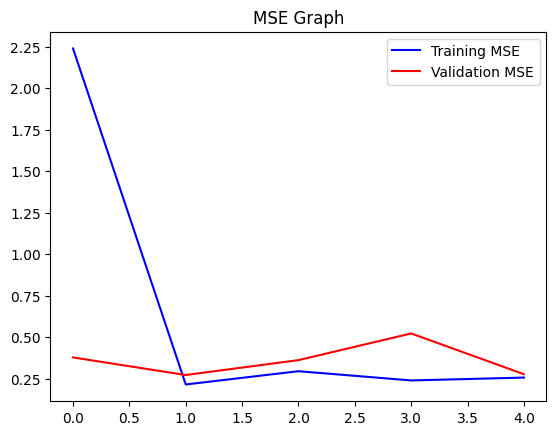

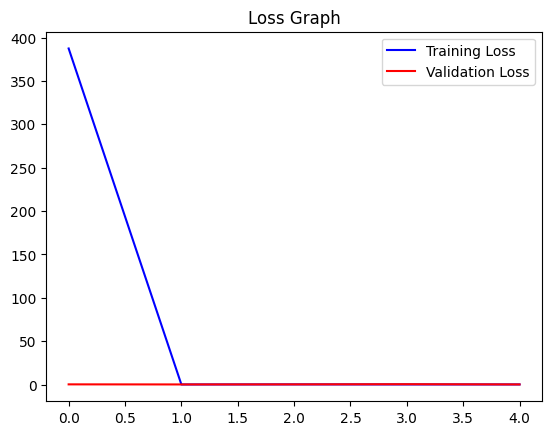

In [10]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [11]:
ypred1 = model.predict(test)

1052/1052 [==============================] - 143s 135ms/step


In [12]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 1000)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred1[index])
print(real_data)
print(predictions)

[3.55, 3.54, 3.49, 3.52]
[array([2.6566885], dtype=float32), array([2.2263064], dtype=float32), array([2.70414], dtype=float32), array([2.101883], dtype=float32)]


In [4]:
model2 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 


In [5]:
model2.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [6]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(512, 512),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(512, 512),
    batch_size=8,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(512, 512), 
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [7]:
history = model2.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
 746/1875 [==========>...................] - ETA: 3:11 - loss: 387.0274 - mae: 3.1995

KeyboardInterrupt: 

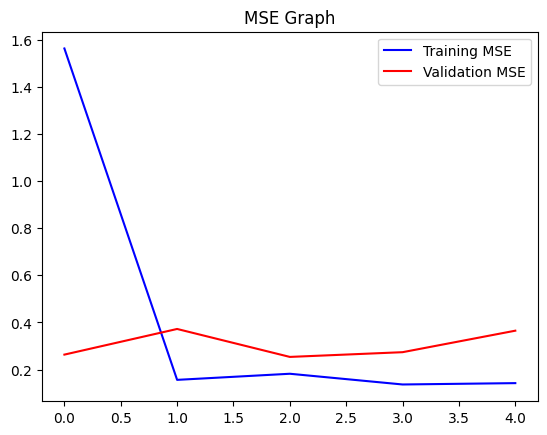

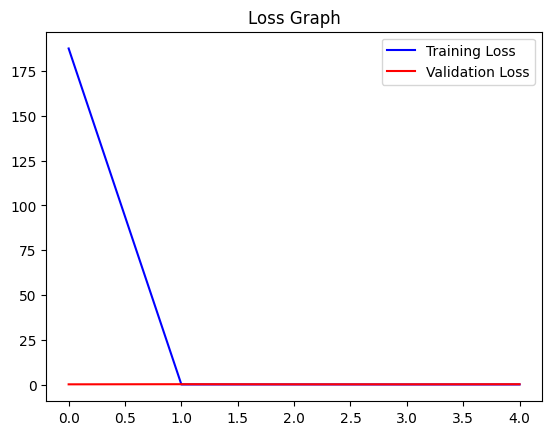

In [17]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [18]:
ypred2 = model2.predict(test)

1052/1052 [==============================] - 111s 106ms/step


In [36]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 1000)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred2[index])
print(real_data)
print(predictions)

[3.39, 3.53, 3.51, 3.48]
[array([2.9259853], dtype=float32), array([2.529662], dtype=float32), array([2.1101873], dtype=float32), array([3.1409855], dtype=float32)]


In [8]:
dfTrain = pd.read_csv('./Train_copia2.csv')
dfValidation = pd.read_csv('./Validation2.csv')
dfTest = pd.read_csv('./Test2.csv')

In [9]:
model3 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 

In [10]:
model3.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [11]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230), 
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [12]:
history = model3.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
938/938 [==============================] - 227s 241ms/step - loss: 17.3019 - mae: 0.8000 - val_loss: 0.1568 - val_mae: 0.3442
Epoch 2/5
938/938 [==============================] - 133s 142ms/step - loss: 0.0422 - mae: 0.1428 - val_loss: 0.2159 - val_mae: 0.4121
Epoch 3/5
938/938 [==============================] - 133s 142ms/step - loss: 0.0284 - mae: 0.1174 - val_loss: 0.2485 - val_mae: 0.4440
Epoch 4/5
938/938 [==============================] - 132s 141ms/step - loss: 0.0233 - mae: 0.1082 - val_loss: 0.2657 - val_mae: 0.4612
Epoch 5/5
938/938 [==============================] - 131s 140ms/step - loss: 0.0187 - mae: 0.0978 - val_loss: 0.2661 - val_mae: 0.4619


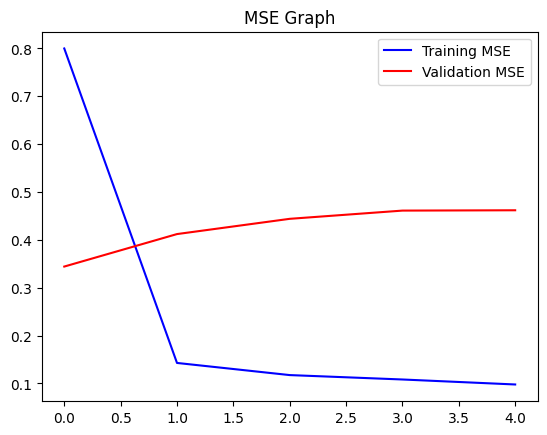

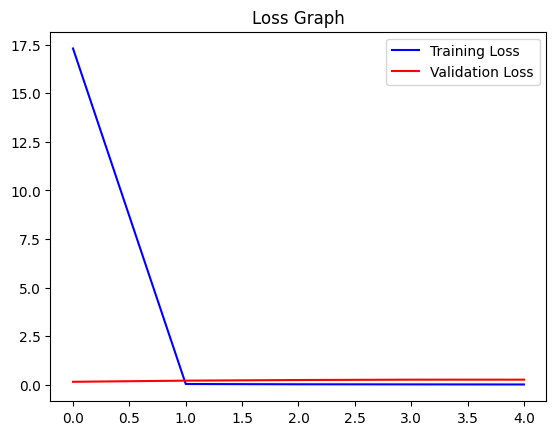

In [20]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [14]:
dfTest.iloc[3][2]

'./new/StateLineWeir_20170701_Farrell_342.jpg'

In [15]:
ypred3 = model3.predict(test)

526/526 [==============================] - 78s 147ms/step


In [17]:
test_loss, test_mae = model3.evaluate(test)

526/526 [==============================] - 43s 82ms/step - loss: 0.1565 - mae: 0.3270


In [18]:
test_loss

0.1565338671207428

In [19]:
test_mae

0.32701894640922546

In [103]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 8400)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred3[index])
print(real_data)
print(predictions)

[3.07, 2.82, 2.37, 3.29]
[array([3.0962567], dtype=float32), array([2.8091562], dtype=float32), array([2.843768], dtype=float32), array([2.3363998], dtype=float32)]


In [29]:
#predictions = []
#real_data = []

#for i in range(4):
#    index = random.randint(0, 1000)
#    new_image = tf.expand_dims(dfTest.iloc[index][2],0)
#    ypred = model.predict(new_image)
#    real_data.append(dfTest.iloc[index][6])
#    predictions.append(ypred)
#print(real_data)
#print(predictions)

In [58]:
dfTrain = pd.read_csv('./Train_copia2.csv')
dfValidation = pd.read_csv('./Validation2.csv')
dfTest = pd.read_csv('./Test2.csv')

In [59]:
model4 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 

In [60]:
from sklearn.metrics import r2_score
model4.compile(loss="mse", optimizer='adam', metrics=[r2_score], run_eagerly=True) 

In [61]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=8,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230), 
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 14998 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 8414 validated image filenames.
Found 8411 validated image filenames.


In [62]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Se ocupa tener una carpeta creada llamada checkpoint para que funcione
filepath='./checkpoint/'
my_callbacks = [
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath, monitor= "val_loss", verbose= 0, save_best_only=False, save_weights_only= False, mode= "auto", save_freq="epoch", options=None, initial_value_threshold=None),
    TensorBoard(log_dir='./logs'),
]

In [63]:
history = model4.fit(train, epochs=4, validation_data=validation)

Epoch 1/4
1875/1875 [==============================] - 238s 127ms/step - loss: 5.8873 - r2_score: -24.3158 - val_loss: 0.2287 - val_r2_score: -0.0120
Epoch 2/4
1875/1875 [==============================] - 247s 132ms/step - loss: 0.0314 - r2_score: 0.8739 - val_loss: 0.2903 - val_r2_score: -0.4568
Epoch 3/4
1875/1875 [==============================] - ETA: 0s - loss: 0.0217 - r2_score: 0.9153

ValueError: in user code:

    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\sklearn\metrics\_regression.py", line 910, in r2_score  *
        y_type, y_true, y_pred, multioutput = _check_reg_targets(
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\sklearn\metrics\_regression.py", line 100, in _check_reg_targets  *
        check_consistent_length(y_true, y_pred)
    File "C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\sklearn\utils\validation.py", line 387, in check_consistent_length  *
        raise ValueError(

    ValueError: Found input variables with inconsistent numbers of samples: [1, 8]


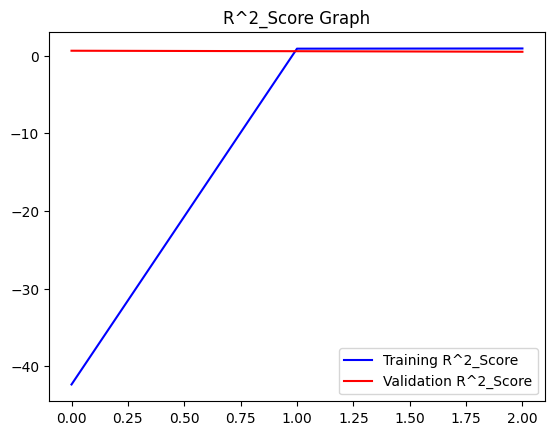

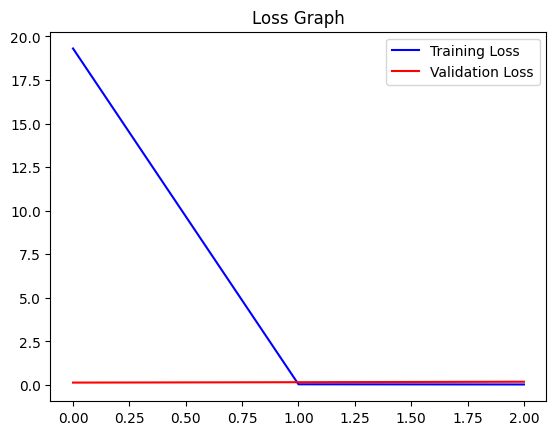

In [39]:
acc = history.history['r2_score']
val_acc = history.history['val_r2_score']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training R^2_Score')
plt.plot(epochs, val_acc, 'r', label='Validation R^2_Score')
plt.title('R^2_Score Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [37]:
ypred4 = model4.predict(test)

526/526 [==============================] - 85s 162ms/step


In [63]:
predictions = []
real_data = []
for i in range(1):
    index = random.randint(0, 8400)
    real_data.append(dfTest.iloc[index][6])
    predictions.append(ypred4[index])
print(real_data)
print(predictions)

[3.22]
[array([2.3924737], dtype=float32)]


In [27]:
dfTrain = pd.read_csv('./train3.csv')
dfValidation = pd.read_csv('./val3.csv')
dfTest = pd.read_csv('./test3.csv')
dfTestWinter = pd.read_csv('./testWinter.csv')
dfTestSummer = pd.read_csv('./testSummer.csv')
dfTestSpring = pd.read_csv('./testSpring.csv')
dfTestAutumn = pd.read_csv('./testAutumn.csv')

In [58]:
dfTest

,index,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,...,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,SensorTimeSeconds,datetime
0,28811,2018-01-01 02:15:00,2018-01-01T02:08:44,./new/StateLineWeir_20180101_Farrell_453.jpg,USGS,6674500,MST,2.45,0.0,2020-03-12T09:26:44,...,393.0,47128.0,17538.540875,10663.453431,0.0,41212.0,16854.627888,10165.028689,1.514773e+09,2018-01-01 02:15:00
1,28812,2018-01-01 06:45:00,2018-01-01T06:44:48,./new/StateLineWeir_20180101_Farrell_457.jpg,USGS,6674500,MST,2.34,0.0,2020-03-12T09:26:46,...,0.0,74062.0,32635.285480,20324.633643,0.0,70220.0,31756.413934,20416.304778,1.514789e+09,2018-01-01 06:45:00
2,28813,2018-01-01 07:00:00,2018-01-01T06:59:49,./new/StateLineWeir_20180101_Farrell_458.jpg,USGS,6674500,MST,2.33,0.0,2020-03-12T09:26:47,...,0.0,80616.0,36381.414274,22022.605055,0.0,76294.0,35388.806557,22170.894569,1.514790e+09,2018-01-01 07:00:00
3,28814,2018-01-01 07:15:00,2018-01-01T07:14:48,./new/StateLineWeir_20180101_Farrell_459.jpg,USGS,6674500,MST,2.32,0.0,2020-03-12T09:26:54,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.514791e+09,2018-01-01 07:15:00
4,28815,2018-01-01 07:30:00,2018-01-01T07:29:48,./new/StateLineWeir_20180101_Farrell_460.jpg,USGS,6674500,MST,2.31,0.0,2020-03-12T09:36:56,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.514792e+09,2018-01-01 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,42054,2019-10-11 09:00:00,2019-10-11T08:59:53,./new/StateLineWeir_20191011_Farrell_409.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:53,...,9284.0,77521.0,38385.370066,15952.029728,0.0,70085.0,37550.894823,16444.401209,1.570784e+09,2019-10-11 09:00:00
13244,42055,2019-10-11 10:00:00,2019-10-11T09:59:52,./new/StateLineWeir_20191011_Farrell_410.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:54,...,10092.0,74614.0,40162.989292,15467.708856,0.0,70061.0,39397.339095,16009.008049,1.570788e+09,2019-10-11 10:00:00
13245,42056,2019-10-11 11:00:00,2019-10-11T10:59:52,./new/StateLineWeir_20191011_Farrell_411.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:55,...,7067.0,83260.0,42095.946590,16770.357949,0.0,76335.0,41350.006568,17489.374617,1.570792e+09,2019-10-11 11:00:00
13246,42057,2019-10-11 12:00:00,2019-10-11T11:59:53,./new/StateLineWeir_20191011_Farrell_412.jpg,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:56,...,6283.0,83045.0,45345.490954,17498.432849,0.0,78882.0,44553.920296,18268.294896,1.570795e+09,2019-10-11 12:00:00


In [28]:
model5 = Sequential([
            Conv2D(32, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Conv2D(128, (3,3), activation='linear'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dense(64, activation='linear'),
            Dense(32, activation='linear'),
            Dense(1, activation='linear')
]) 

In [29]:
model5.compile(optimizer='adam', metrics=['mae'], loss="mean_squared_error",)

In [30]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

generator = ImageDataGenerator(
    rescale= 1. / 255,
    preprocessing_function=to_grayscale_then_rgb
)

train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

testWinter = generator.flow_from_dataframe(
    dataframe=dfTestWinter,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

testSummer = generator.flow_from_dataframe(
    dataframe=dfTestSummer,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

testSpring = generator.flow_from_dataframe(
    dataframe=dfTestSpring,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

testAutumn = generator.flow_from_dataframe(
    dataframe=dfTestAutumn,
    x_col=' Filename', 
    y_col=' Stage',
    target_size=(280, 230),
    batch_size=16,
    class_mode='raw',
    validate_filenames=True
)

validation = generator.flow_from_dataframe(
    dataframe=dfValidation,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(280, 230), 
    batch_size=16, 
    class_mode='raw',
    validate_filenames=True
)

Found 21420 validated image filenames.


C:\Users\david\miniconda3\envs\tf_2.4\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col=" Filename". These filename(s) will be ignored.
  warnings.warn(


Found 13248 validated image filenames.
Found 2661 validated image filenames.
Found 4280 validated image filenames.
Found 4450 validated image filenames.
Found 1857 validated image filenames.
Found 7390 validated image filenames.


In [31]:
history = model5.fit(train, epochs=5, validation_data=validation)

Epoch 1/5
1339/1339 [==============================] - 276s 206ms/step - loss: 15.1389 - mae: 0.7158 - val_loss: 0.1493 - val_mae: 0.3076
Epoch 2/5
1339/1339 [==============================] - 168s 125ms/step - loss: 0.0795 - mae: 0.2102 - val_loss: 0.3675 - val_mae: 0.5388
Epoch 3/5
1339/1339 [==============================] - 163s 122ms/step - loss: 0.0502 - mae: 0.1649 - val_loss: 0.0751 - val_mae: 0.2142
Epoch 4/5
1339/1339 [==============================] - 166s 124ms/step - loss: 0.0347 - mae: 0.1360 - val_loss: 0.0886 - val_mae: 0.2370
Epoch 5/5
1339/1339 [==============================] - 164s 122ms/step - loss: 0.0255 - mae: 0.1164 - val_loss: 0.0676 - val_mae: 0.1959


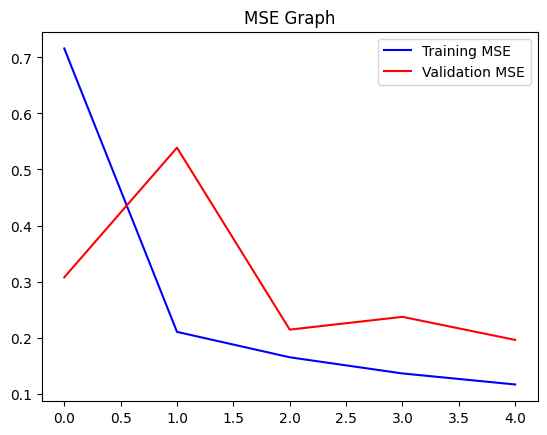

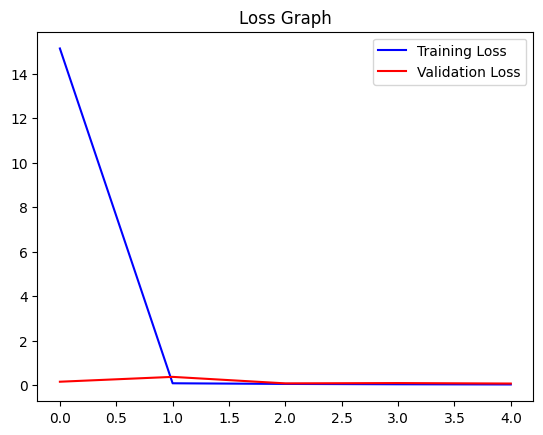

In [32]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('MSE Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [46]:
ypred3 = model5.predict(test)

828/828 [==============================] - 67s 81ms/step


In [47]:
test_loss, test_mae = model5.evaluate(test)

828/828 [==============================] - 69s 83ms/step - loss: 0.1439 - mae: 0.3077


In [48]:
print(test_loss)
test_mae

0.14389780163764954


0.3077220916748047

In [49]:
test_loss_autumn, test_mae_autumn = model5.evaluate(testAutumn)

117/117 [==============================] - 9s 79ms/step - loss: 0.1484 - mae: 0.2727


In [50]:
print(test_loss_autumn)
test_mae_autumn

0.14840790629386902


0.2727087438106537

In [51]:
test_loss_spring, test_mae_spring = model5.evaluate(testSpring)

279/279 [==============================] - 23s 83ms/step - loss: 0.1755 - mae: 0.3423


In [52]:
print(test_loss_spring)
test_mae_spring

0.17550510168075562


0.34228748083114624

In [53]:
test_loss_summer, test_mae_summer = model5.evaluate(testSummer)

268/268 [==============================] - 22s 81ms/step - loss: 0.0940 - mae: 0.2567


In [54]:
print(test_loss_summer)
test_mae_summer

0.09399978816509247


0.2567172050476074

In [55]:
test_loss_winter, test_mae_winter = model5.evaluate(testWinter)

167/167 [==============================] - 14s 84ms/step - loss: 0.1682 - mae: 0.3564


In [56]:
print(test_loss_winter)
test_mae_winter

0.1681506484746933


0.35638993978500366

In [63]:
predictions = []
real_data = []
for i in range(4):
    index = random.randint(0, 8400)
    real_data.append(dfTest.iloc[index][7])
    predictions.append(ypred3[index])
print(real_data)
print(predictions)

[2.42, 3.1, 2.23, 2.23]
[array([2.4835947], dtype=float32), array([2.9343166], dtype=float32), array([2.5145679], dtype=float32), array([2.4965417], dtype=float32)]
